In [1]:
"""
Template for week 11 project in Data Visualization

Compute k-means clustering
Plot clusters and centers for both clustering methods
Compute and compare distortions for both clustering methods
"""

import random
import time
import matplotlib as mpl
import matplotlib.pyplot as plt
import project10_provided as provided
import project10_solution as project10

In [2]:
# Resource paths
DATA_PATH = "data/"

# Set global flags
SAVE_PLOTS = False


In [3]:
######################################################################
# Part 1 - Compute and plot k-means clusterings in various styles
def find_clostest(cluster_list, cluster):
    """helper function"""
    min_dist = float('inf')
    clostest = None
    for idx in range(len(cluster_list)):
        dist = cluster.distance(cluster_list[idx])
        if dist < min_dist:
            min_dist = dist
            clostest = idx
    return clostest
        
def kmeans_clustering(cluster_list, num_clusters, num_iterations):
    """
    Input: List of clusters, number of clusters, number of iterations
    
    Output: List of clusters whose length is num_clusters
    
    NOTE: The function may mutate cluster_list
    
    """

    size = len(cluster_list)
    cluster_list.sort(key=lambda x: x.total_population(), reverse=True)

    clusters = cluster_list[:num_clusters]
    for _ in range(num_iterations):
        sets = [provided.Cluster(set(), 0, 0, 0, 0) for _ in range(num_clusters)]
        for idx_j in range(size): 
            clostest_mean_idx = find_clostest(clusters, cluster_list[idx_j])
            sets[clostest_mean_idx].merge_clusters(cluster_list[idx_j])

        clusters = sets
    return clusters

In [4]:
def test_kmeans_clustering():
    """ Tests for kmeans clustering """
    
    risk_frame = provided.risk_csv_to_dataframe(provided.DATA_24)
    for num_clusters, num_iterations in [[15, 1], [15, 3], [15, 5], [10, 1], 
                                         [10, 3], [10, 5], [5, 1], [5, 3], [5, 5]]:
        singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame)
        kmeans_clustering(singleton_clusters, num_clusters, num_iterations)
    
    risk_frame = provided.risk_csv_to_dataframe(provided.DATA_111)
    for num_clusters in [40, 35, 20, 12, 5]:
        singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame)
        kmeans_clustering(singleton_clusters, num_clusters, 5)
    
    risk_frame = provided.risk_csv_to_dataframe(provided.DATA_290)
    for num_clusters in [40, 35, 20, 12, 5]:
        singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame)
        kmeans_clustering(singleton_clusters, num_clusters, 5)
        
test_kmeans_clustering()

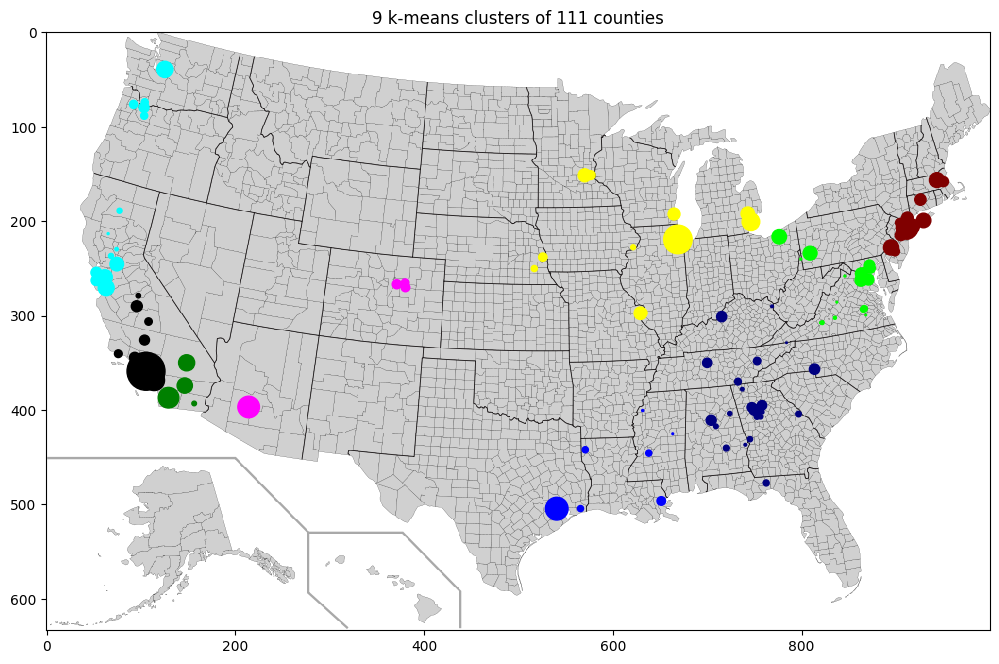

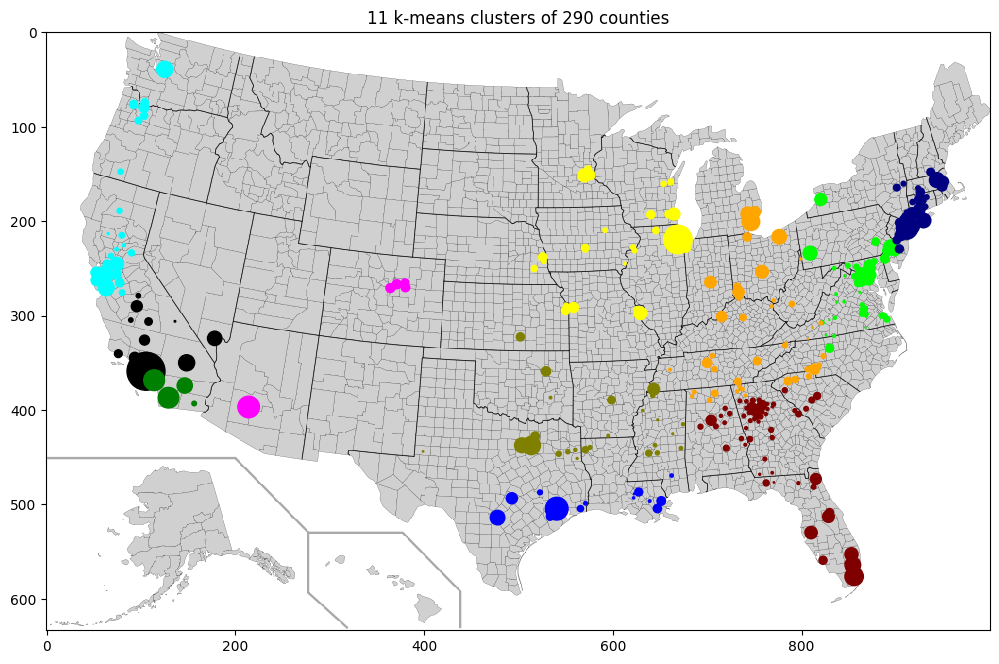

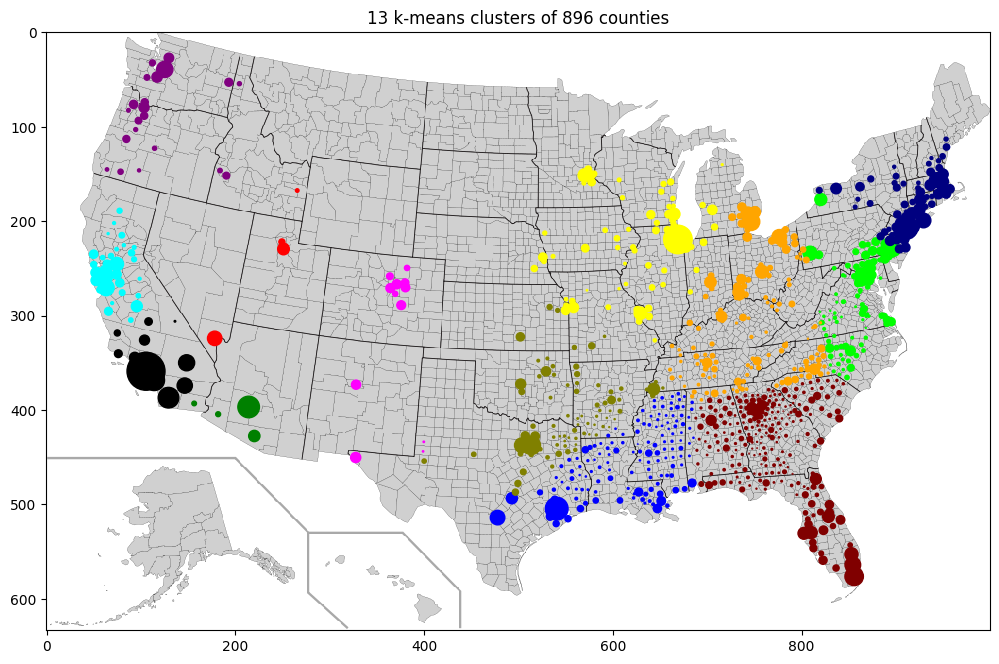

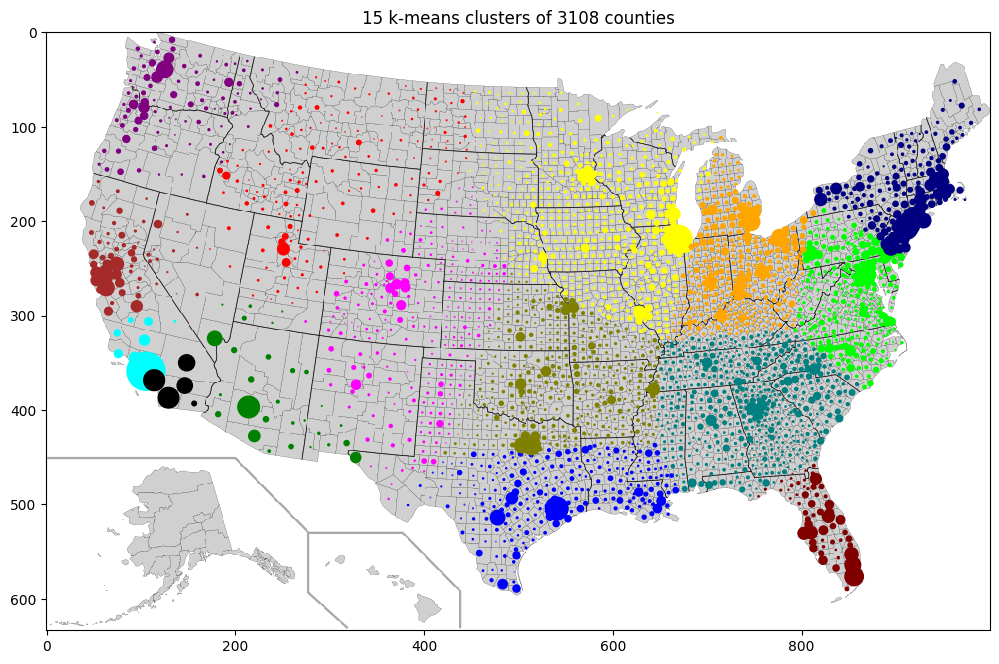

In [5]:
def plot_kmeans_clusterings():
    """ Plot some examples of k-means clusterings """
    
    # Clustering for 111 high-risk counties
    risk_frame_111 = provided.risk_csv_to_dataframe(provided.DATA_111)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_111)
    clusters_111_9 = kmeans_clustering(singleton_clusters, 9, 5)
    provided.plot_clusters_members(clusters_111_9, risk_frame_111,
                                   title="9 k-means clusters of 111 counties",
                                   save_plot=SAVE_PLOTS)
    
    # Clustering for 290 high-risk counties
    risk_frame_290 = provided.risk_csv_to_dataframe(provided.DATA_290)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_290)
    clusters_290_11 = kmeans_clustering(singleton_clusters, 11, 5)
    provided.plot_clusters_members(clusters_290_11, risk_frame_290,
                                   title="11 k-means clusters of 290 counties",
                                   save_plot=SAVE_PLOTS)
    
    # Clustering for 896 high-risk counties (not in TEST_CASES)
    risk_frame_896 = provided.risk_csv_to_dataframe(provided.DATA_896)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_896)
    clusters_896_13 = kmeans_clustering(singleton_clusters, 13, 5)
    provided.plot_clusters_members(clusters_896_13, risk_frame_896,
                                   title="13 k-means clusters of 896 counties",
                                   save_plot=SAVE_PLOTS)
    
    #Clustering for 3108 high-risk counties (not in TEST_CASES)
    risk_frame_3108 = provided.risk_csv_to_dataframe(provided.DATA_3108)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_3108)
    clusters_3108_15 = kmeans_clustering(singleton_clusters, 15, 5)
    provided.plot_clusters_members(clusters_3108_15, risk_frame_3108,
                                  title="15 k-means clusters of 3108 counties",
                                  save_plot=SAVE_PLOTS)
    
# Default DPI for notebook graphics is 72, override for higher resolution images
mpl.rcParams['figure.dpi'] = 100

plot_kmeans_clusterings()  

In [6]:
def plot_clusters_centers(cluster_list, risk_frame, 
                          title="Clusters of counties (with center) based on cancer risk", 
                          save_plot=False):
    """
    Input: List cluster_list, dataframe risk_frame (indexed by FIPS)
    
    Output: matplotlib figure of USA map with cluster members 
    connected to corresponding center
    """
    colors = ['Aqua', 'Yellow', 'Blue', 'Fuchsia', 'Black', 'Green', 
              'Lime', 'Maroon', 'Navy', 'Olive', 'Orange', 'Purple', 'Red', 'Brown', 'Teal']
    
    fig = provided.plot_clusters_members(cluster_list, risk_frame, 
                                         title, save_plot=False)
    center_x = []
    center_y = []
    center_pop = []
    for idx in range(len(cluster_list)):
        center_x.append(cluster_list[idx].horiz_center())
        center_y.append(cluster_list[idx].vert_center())
        center_pop.append(provided.marker_size(cluster_list[idx].total_population()))
        
    #draw the center
    plt.scatter(x=center_x, y=center_y, marker="o", 
                s=center_pop, facecolors='none', edgecolors='black', zorder=2)
        
    #draw the lines
    for cluster_idx in range(len(cluster_list)):
        cluster = cluster_list[cluster_idx]
        cluster_color = colors[cluster_idx % len(colors)]
        for fips_code in cluster.fips_codes():
            plt.plot([center_x[cluster_idx], risk_frame.loc[fips_code, "x center"]], 
                     [center_y[cluster_idx], risk_frame.loc[fips_code, "y center"]], 
                     "-o", color=cluster_color, markersize=0, linewidth=1, zorder=1)
    return fig

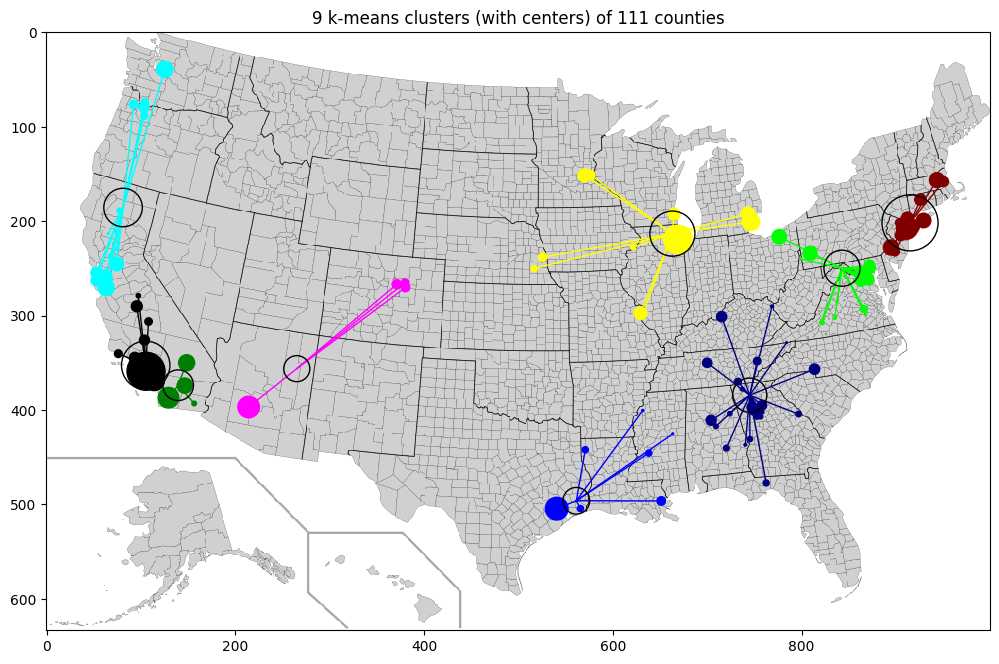

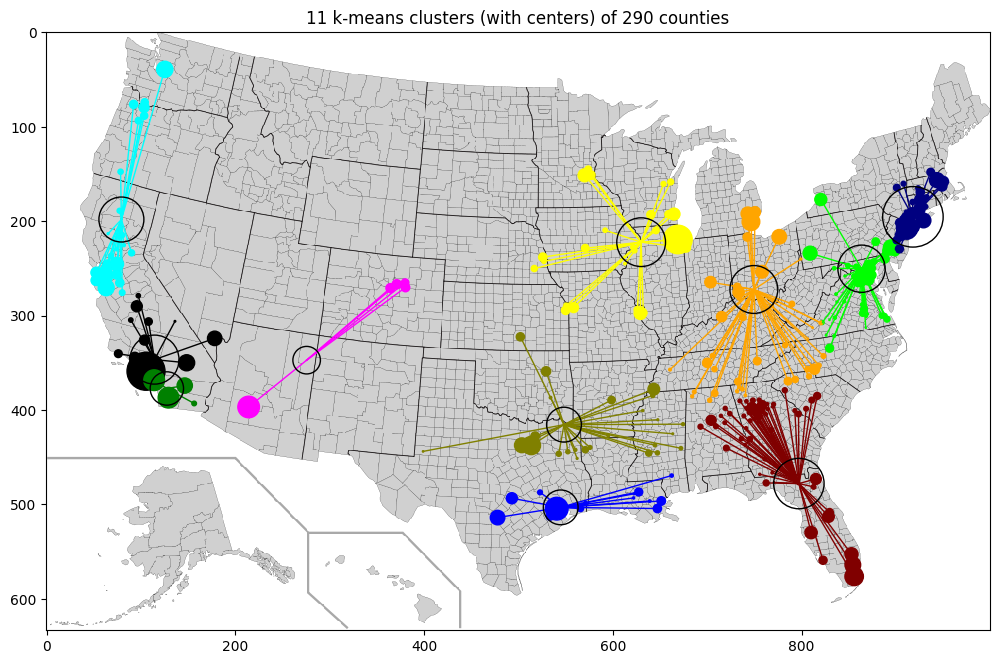

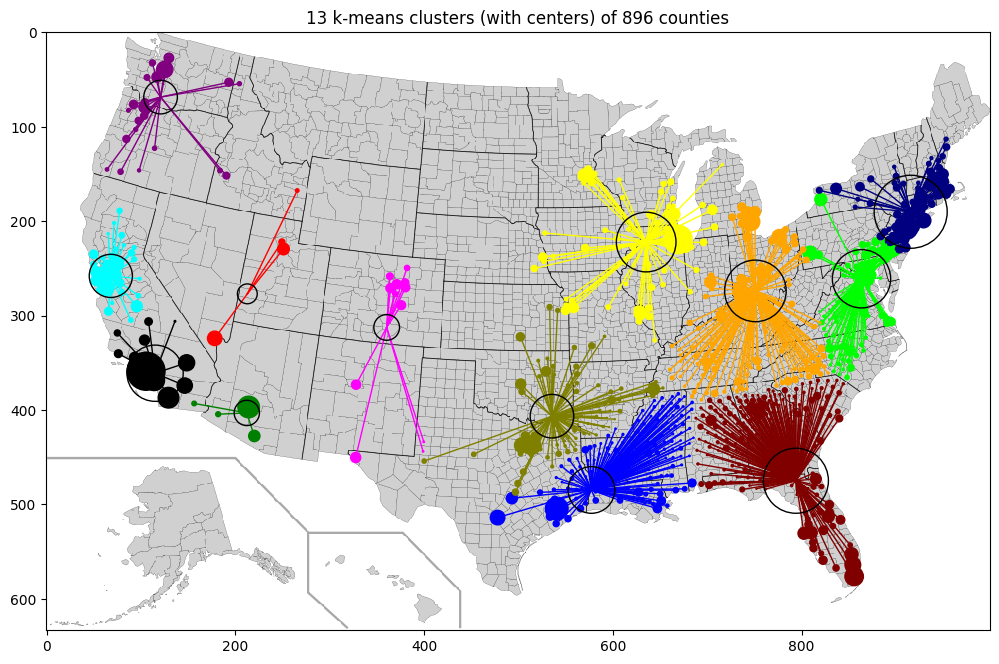

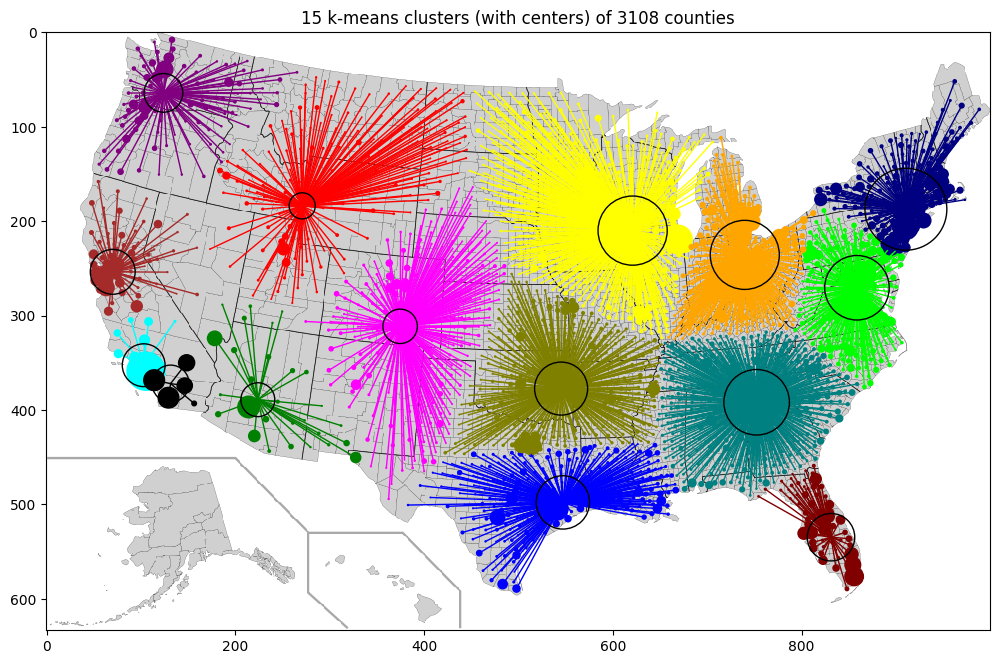

In [7]:
def test_plot_clusters_centers():
    """ Test plot_clusters_centers()"""
    
    # Clustering for 111 high-risk counties
    risk_frame_111 = provided.risk_csv_to_dataframe(provided.DATA_111)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_111)
    clusters_111_9 = kmeans_clustering(singleton_clusters, 9, 5)
    plot_clusters_centers(clusters_111_9, risk_frame_111,
                          title="9 k-means clusters (with centers) of 111 counties",
                          save_plot=SAVE_PLOTS)
    
    # Clustering for 290 high-risk counties
    risk_frame_290 = provided.risk_csv_to_dataframe(provided.DATA_290)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_290)
    clusters_290_11 = kmeans_clustering(singleton_clusters, 11, 5)
    plot_clusters_centers(clusters_290_11, risk_frame_290,
                          title="11 k-means clusters (with centers) of 290 counties",
                          save_plot=SAVE_PLOTS)
    
    # Clustering for 896 high-risk counties (not in TEST_CASES)
    risk_frame_896 = provided.risk_csv_to_dataframe(provided.DATA_896)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_896)
    clusters_896_13 = kmeans_clustering(singleton_clusters, 13, 5)
    plot_clusters_centers(clusters_896_13, risk_frame_896,
                          title="13 k-means clusters (with centers) of 896 counties",
                          save_plot=SAVE_PLOTS) 
    
    #Clustering for 3108 high-risk counties (not in TEST_CASES)
    risk_frame_3108 = provided.risk_csv_to_dataframe(provided.DATA_3108)
    singleton_clusters = provided.dataframe_to_singleton_clusters(risk_frame_3108)
    clusters_3108_15 = kmeans_clustering(singleton_clusters, 15, 5)
    plot_clusters_centers(clusters_3108_15, risk_frame_3108,
                         title="15 k-means clusters (with centers) of 3108 counties",
                         save_plot=SAVE_PLOTS)
    
test_plot_clusters_centers()

In [8]:
##################################################################################################
# Part 2 - Plot running times for closest pair methods and distortion for clustering methods

# Provided code
def gen_random_cluster(num_clusters):
    """
    Input: integer num_clusters
    
    Output: List of empty clusters of length num_clusters
    with centers randomly distributed in [-1, 1]^2
    """
    
    cluster_list = []
    for dummy_index in range(num_clusters):
        new_cluster = provided.Cluster(set([]), 2 * random.random() - 1, 
                                       2 * random.random() - 1, 0, 0)
        cluster_list.append(new_cluster)
    return cluster_list

In [9]:
def plot_closest_pair_times(max_clusters, title="Running time of slow vs. fast closest pairs"):
    """
    Input: Integer max_clusters
    
    Output: matplotlib figure consisting of plot comparing
    of running times slow_closest_pair() and fast_closest_pair()
    for specified number of clusters created using gen_random_cluster().
    """

    fig, axs = plt.subplots()
    slow_times = []
    fast_times = []
    for idx in range(max_clusters):
        clusters = gen_random_cluster(idx + 1)
        
        start_time = time.time()
        project10.slow_closest_pair(clusters)
        end_time = time.time()
        slow_times.append(end_time - start_time)
        
        start_time = time.time()
        project10.fast_closest_pair(clusters)
        end_time = time.time()
        fast_times.append(end_time - start_time)
    
    axs.plot(range(1, max_clusters + 1), slow_times, label="slow_closest_pair")
    axs.plot(range(1, max_clusters + 1), fast_times, label="fast_closest_pair")
    axs.set_title(title)
    axs.set_xlabel("size of clusters")
    axs.set_ylabel("running time in sec")
    axs.legend()
    
    return fig

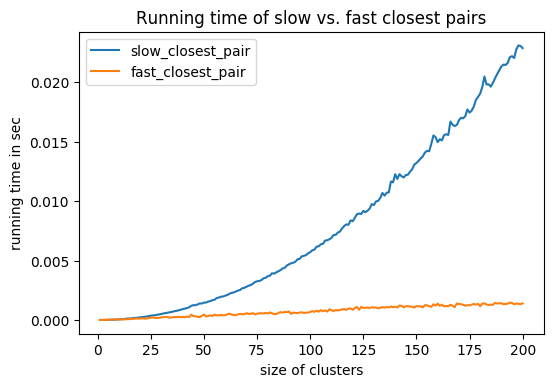

In [10]:
def test_plot_closest_pair_times():
    """ Test plot_closest_pair_times() """
            
    plot_closest_pair_times(200, "Running time of slow vs. fast closest pairs")


test_plot_closest_pair_times()

In [14]:
def hierarchical_distortion(cluster_list, risk_frame, min_clusters, max_clusters):
    """
    Input: List cluster_list of clusters, dataframe risk_frame, 
    integers min_clusters, max_clusters

    Output: List whose entries are [num_clusters, distortion] where distortion 
    is the distortion associated with the hierachical clustering of size num_clusters
    """
    res = []
    
    for size in range(min_clusters, max_clusters + 1):
        cluster_list = provided.dataframe_to_singleton_clusters(risk_frame)
        error = sum([cluster.cluster_error(risk_frame) 
                     for cluster in project10.hierarchical_clustering(cluster_list, size)])
        res.append(error / DISTORTION_SCALE)
        
    return res

In [15]:
DISTORTION_SCALE = 10 ** 11

def plot_distortion(risk_frame, min_clusters, max_clusters, 
                    title="Distortion for hierarchical vs k-means clusterings"):
    """
    Input: dataframe risk_frame, integers min_clusters, max_clusters, optional string title
    
    Output: matplotlib figure generated by computing and plotting 
    distortions for hierarchical and k-means clustering algorithms
    """
    
    fig, axs = plt.subplots()
    cluster_list = provided.dataframe_to_singleton_clusters(risk_frame)
    
    k_means_error = []
    hierarchical_error = hierarchical_distortion(cluster_list, 
                                                 risk_frame, min_clusters, max_clusters)
    
    cluster_list = provided.dataframe_to_singleton_clusters(risk_frame)
    
    for size in range(min_clusters, max_clusters + 1):
        k_means_res = sum([cluster.cluster_error(risk_frame) 
                           for cluster in kmeans_clustering(cluster_list.copy(), size, 5)])
        k_means_error.append(k_means_res / DISTORTION_SCALE)
    
    axs.plot(range(min_clusters, max_clusters + 1), k_means_error, label="k_means")
    axs.plot(range(min_clusters, max_clusters + 1), hierarchical_error, label="hierarchical")
    
    axs.set_title(title)
    axs.set_xlabel("size of clusters")
    axs.set_ylabel("distortion * 10^11")
    axs.legend()
    
    return fig

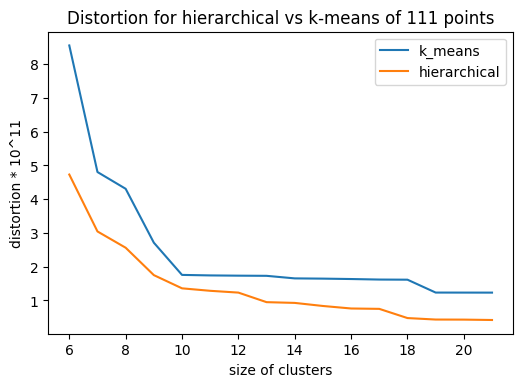

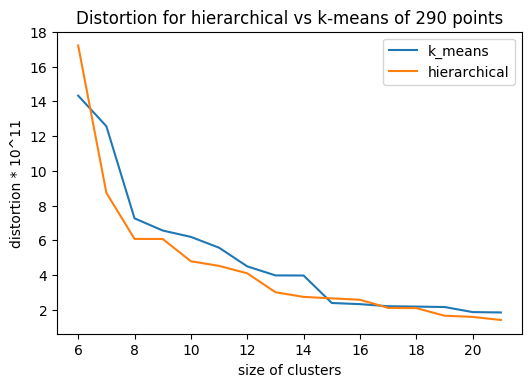

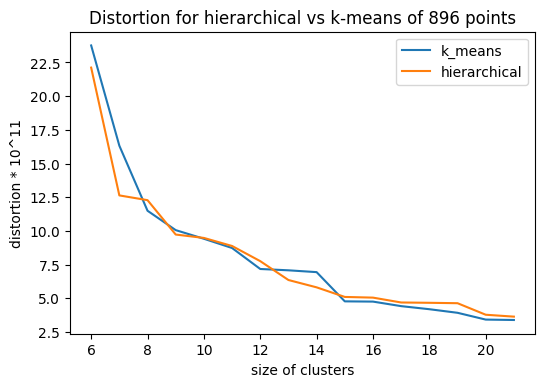

In [16]:
def test_plot_distortion():
    """ Test plot_distortion() """
    
    risk_frame_111 = provided.risk_csv_to_dataframe(provided.DATA_111)
    plot_distortion(risk_frame_111, 6, 21, 
                    "Distortion for hierarchical vs k-means of 111 points")
    
    risk_frame_290 = provided.risk_csv_to_dataframe(provided.DATA_290)    
    plot_distortion(risk_frame_290, 6, 21, 
                   "Distortion for hierarchical vs k-means of 290 points")
    
    risk_frame_896 = provided.risk_csv_to_dataframe(provided.DATA_896)
    plot_distortion(risk_frame_896, 6, 21, 
                  "Distortion for hierarchical vs k-means of 896 points")

test_plot_distortion()